# Wine Quality Classifier

##### LOAD THE DATA

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('winequality-white.csv', sep=';')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### DATA OVERVIEW

In [2]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### VISUALIZE THE RELATIONSHIP AMOUNG SOME FEATURES

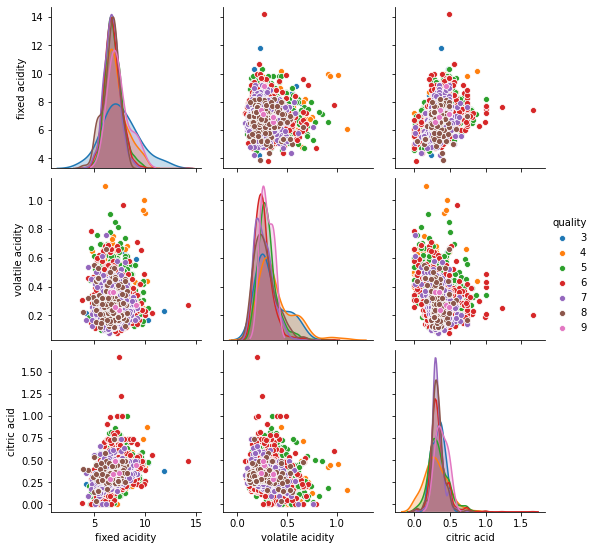

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

relationship = sns.pairplot(X, vars=['fixed acidity','volatile acidity','citric acid'], hue='quality')
plt.show(relationship)

##### DATA STANDARIZATION AND VISUALIZATION OF FEATURES VS TARGET

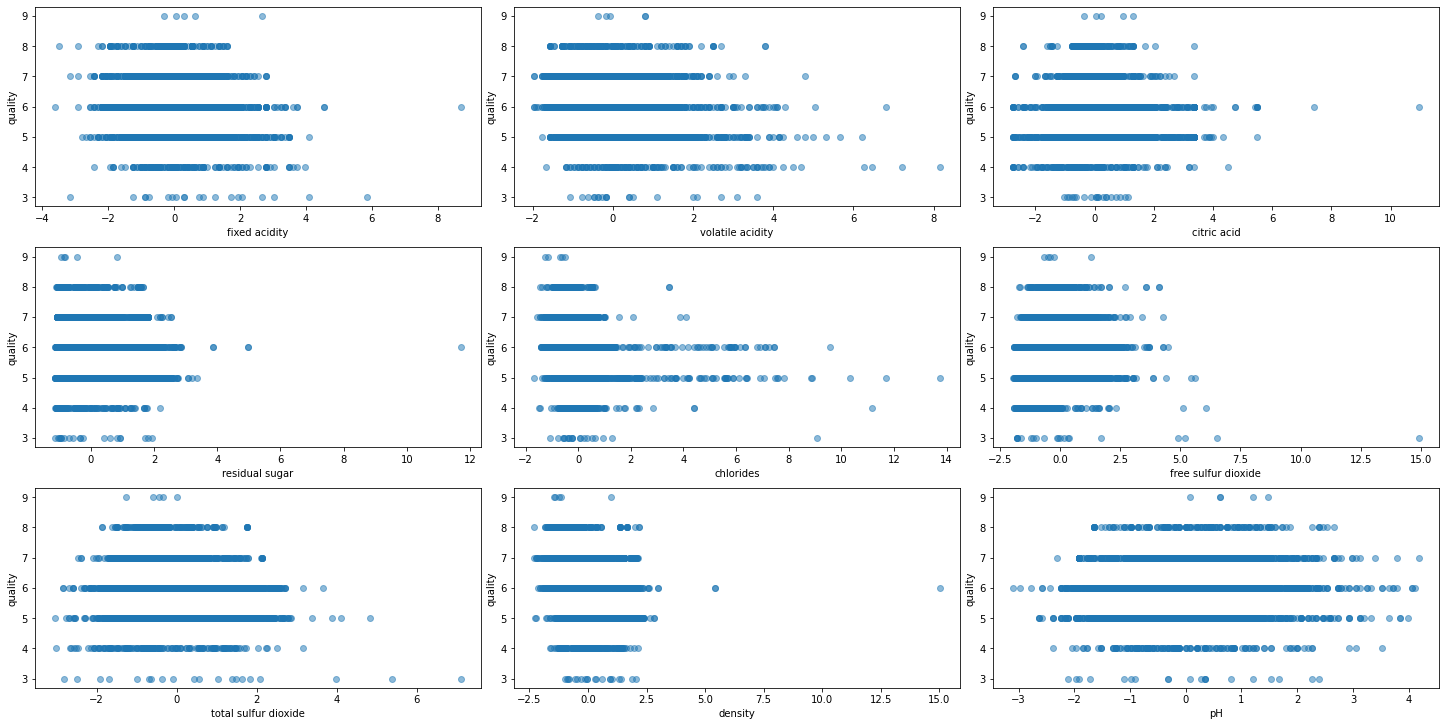

In [4]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# separate feature and target values
Y = X['quality'].copy()
X = X.drop(columns=['quality'])


# apply standarization to the feature values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

'''
m_scaler = MinMaxScaler(feature_range=(0, ))
m_scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)
'''

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

In [5]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,2.321087e-17,-1.015476e-17,-4.642174e-17,3.256485e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


##### TRANSFORM THE TARGET VALUES TO ONE-HOT ENCODING

In [6]:
Y = pd.get_dummies(Y, drop_first=True)
Y.head()

,4,5,6,7,8,9
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


##### SPLIT THE DATA

In [7]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

print ("Shape of (X_train, X_test, Y_train, Y_test)")
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Shape of (X_train, X_test, Y_train, Y_test)
(3918, 11) (980, 11) (3918, 6) (980, 6)


##### DEFINE NETWORK PARAMETERS

In [9]:
import tensorflow as tf

dimX = X_train.shape[1]    
dimY = Y_train.shape[1]
nTrain = X_train.shape[0]
nTest = X_test.shape[0]

nLayer0 = dimX   # =11
nLayer1 = 100
nLayer2 = 100
nLayer3 =  dimY  # =6

sigma_init = 0.01   # For randomized initialization


##### MODEL ARCHITECTURE

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# create symbolic variables
X = tf.placeholder(tf.float32, [None, dimX], name="input")
Y = tf.placeholder(tf.float32, [None, dimY], name="output")

# deploy the variables that will store the weights
W = {
    'W1': tf.Variable(tf.random_normal([nLayer0, nLayer1], stddev = sigma_init), name='W1'),
    'W2': tf.Variable(tf.random_normal([nLayer1, nLayer2], stddev = sigma_init), name='W2'),
    'W3': tf.Variable(tf.random_normal([nLayer2, nLayer3], stddev = sigma_init), name='W3')
}

# deploy the variables that will store the bias
b = {
    'b1': tf.Variable(tf.random_normal([nLayer1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([nLayer2]), name='b2'),
    'b3': tf.Variable(tf.random_normal([nLayer3]), name='b3')
}

# this will create the model architecture and enable dropout on the hidden layers
# in order tto avoid overfitting the training accuracy
keep_prob = 0.75

def model_MLP(_X, _W, _b):
    with tf.name_scope('hidden_1'):
        Layer1 = tf.nn.selu(tf.add(tf.matmul(_X,_W['W1']), _b['b1']))
        Layer1 = tf.nn.dropout(Layer1, keep_prob)
        
    with tf.name_scope('hidden_2'):
        Layer2 = tf.nn.selu(tf.add(tf.matmul(Layer1,_W['W2']), _b['b2']))
        Layer2 = tf.nn.dropout(Layer2, keep_prob)
        
    with tf.name_scope('layer_output'):
        Layer3 = tf.add(tf.matmul(Layer2,_W['W3']), _b['b3'])
        return Layer3
    
with tf.name_scope("MLP"):
    Y_pred = model_MLP(X, W, b)
    
#tf.add_to_collection('vars', W)
#tf.add_to_collection('vars', b)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


##### DEFINE LEARNING RATE

In [12]:
learning_rate = 0.6

# CHOOSE A DECAYING METHOD IN HERE
model_decay = 'exponential'      # [exponential | inverse_time | natural_exponential | polynomial | none]

global_step = tf.Variable(0, trainable=False)
decay_rate = 0.90
decay_step = 10000

if model_decay == 'exponential':
    learning_rate = tf.train.exponential_decay(learning_rate, global_step, decay_step, decay_rate)

elif model_decay == 'inverse_time':
    learning_rate = tf.train.inverse_time_decay(learning_rate, global_step, decay_step, decay_rate)
    
elif model_decay == 'natural_exponential':
    learning_rate = tf.train.natural_exp_decay(learning_rate, global_step, decay_step, decay_rate)
    
elif model_decay == 'polynomial':
    end_learning_rate = 0.001
    learning_rate = tf.train.polynomial_decay(learning_rate, global_step, decay_step, end_learning_rate, power=0.5)
    
else:
    decay_rate = 1.0
    learning_rate = tf.train.exponential_decay(learning_rate, global_step, decay_step, decay_rate)

print('Decaying Learning Rate : ', model_decay)

Decaying Learning Rate :  exponential


##### DEFINE MODEL TRAINING AND MEASURE PERFORMANCE
If X only has one column (one variable) don't use tf.reduce_mean in the definition of the loss function

In [13]:
with tf.name_scope("loss"):
    #loss = tf.square(Y - Y_pred)                                                       # squared error
    #loss = tf.nn.softmax(logits=Y_pred)                                                # softmax
    #loss = tf.nn.log_softmax(logits=Y_pred)                                            # log-softmax
    #loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_pred, dim=-1) # cross-entropy
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=Y_pred)            # sigmoid-cross-entropy
    #loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=Y_pred)     # sparse-softmax-cross-entropy
    loss = tf.reduce_mean(loss, name='MSE')
    
with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)                     # SGD
    #optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9) # MOMENTUM
    #optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)               # ADAGRAD
    optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)              # ADADELTA
    #optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=1)      # RMS
    training_op = optimizer.minimize(loss, global_step=global_step)

with tf.name_scope("eval"):
    correct_prediction = tf.equal(tf.argmax(Y_pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    

# Create summaries
tf.summary.scalar("loss", loss)
tf.summary.scalar("accuracy", accuracy)
tf.summary.scalar("learn_rate", learning_rate)

# Merge all summaries into a single op to generate the summary data
merged_summary_op = tf.summary.merge_all()

##### EXECUTE THE MODEL

In [14]:
from datetime import datetime

# define some parameters
n_epochs = 1500
display_epoch = 50
batch_size = 32
n_batches = int(nTrain/batch_size)

# set up the directory to store the results for tensorboard
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

# this will later help me to restore the model to a specific epoch
saver = tf.train.Saver(tf.global_variables())

# store results through every epoch iteration
acc_train_list = []
acc_test_list = []
learning_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # write logs for tensorboard
    summary_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())
    
    for epoch in range(1, n_epochs+1):
        avg_loss = 0    # store batches' average loss
        
        # create batches
        index = list(X_train.index.values)
        lower_bound = 0
        for i in range(n_batches):
            batch_index = index[lower_bound:(lower_bound+batch_size)]
            lower_bound += batch_size
            X_batch = X_train.loc[batch_index, :]
            Y_batch = Y_train.loc[batch_index, :]
            
            # start model training
            sess.run(training_op, feed_dict={X:X_batch, Y:Y_batch})
            
            
            # Run optimization (backprop), cost and summary nodes
            _, _loss, _summary = sess.run([training_op, loss, merged_summary_op],
                                          feed_dict={X:X_batch, Y:Y_batch})
            avg_loss += _loss/n_batches
            
            # Write logs at every iteration
            summary_writer.add_summary(_summary, epoch * n_batches + i)
            
        # measure performance and display the results
        if (epoch+1) % display_epoch == 0:
            _acc_train = accuracy.eval({X: X_train, Y:Y_train})
            _acc_test = accuracy.eval(feed_dict={X: X_test, Y: Y_test})
            
            # append results to lists
            acc_train_list.append(_acc_train); acc_test_list.append(_acc_test)
            learning_list.append(sess.run(learning_rate))
            
            # Save model weights to disk for reproducibility
            saver = tf.train.Saver(max_to_keep=15)
            saver.save(sess, "tf_checkpoints/epoch{:04}.ckpt".format((epoch+1)))
            
            print("Epoch: {:04}\tTrainAcc: {:06.5f}\tTestAcc: {:06.5f}\tLoss: {:06.5f}\tLearning: {:06.7f}".format((epoch+1),
                                                                                                                   _acc_train,
                                                                                                                   _acc_test,
                                                                                                                   avg_loss,
                                                                                                                   sess.run(learning_rate)))

Epoch: 0050	TrainAcc: 0.54620	TestAcc: 0.52959	Loss: 0.30163	Learning: 0.5289853
Epoch: 0100	TrainAcc: 0.55130	TestAcc: 0.54796	Loss: 0.29719	Learning: 0.4651783
Epoch: 0150	TrainAcc: 0.55207	TestAcc: 0.56122	Loss: 0.29480	Learning: 0.4090678
Epoch: 0200	TrainAcc: 0.55590	TestAcc: 0.54286	Loss: 0.29463	Learning: 0.3597254
Epoch: 0250	TrainAcc: 0.55513	TestAcc: 0.53571	Loss: 0.29365	Learning: 0.3163348
Epoch: 0300	TrainAcc: 0.56355	TestAcc: 0.56020	Loss: 0.29328	Learning: 0.2781780
Epoch: 0350	TrainAcc: 0.56330	TestAcc: 0.55204	Loss: 0.29126	Learning: 0.2446238
Epoch: 0400	TrainAcc: 0.55845	TestAcc: 0.53265	Loss: 0.29126	Learning: 0.2151169
Epoch: 0450	TrainAcc: 0.56764	TestAcc: 0.54694	Loss: 0.28977	Learning: 0.1891692
Epoch: 0500	TrainAcc: 0.57249	TestAcc: 0.55408	Loss: 0.28916	Learning: 0.1663513
Epoch: 0550	TrainAcc: 0.56738	TestAcc: 0.54898	Loss: 0.28934	Learning: 0.1462858
Epoch: 0600	TrainAcc: 0.56508	TestAcc: 0.56020	Loss: 0.28947	Learning: 0.1286406
Epoch: 0650	TrainAcc: 0.5717

##### VISUALIZE THE RESULTS

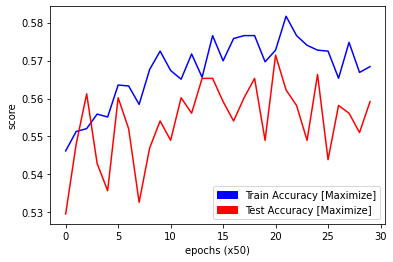

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
red_patch = mpatches.Patch(color='red', label='Test Accuracy [Maximize]')
plt.legend(handles=[blue_patch,red_patch])

plt.plot(acc_train_list, color='blue')
plt.plot(acc_test_list, color='red')

plt.xlabel('epochs (x{})'.format(display_epoch))
plt.ylabel('score');

##### LEARNING RATE EVOLUTION

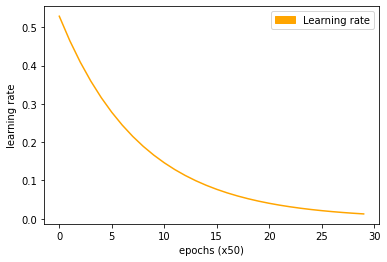

In [16]:
or_patch = mpatches.Patch(color='orange', label='Learning rate')
plt.legend(handles=[or_patch])

plt.plot(learning_list, color='orange');
plt.xlabel('epochs (x{})'.format(display_epoch))
plt.ylabel('learning rate');

##### VISUALIZE TENSORBOARD

In [15]:
from IPython.display import clear_output, Image, display, HTML

#   CHECK IT ON TENSORBOARD TYPING THESE LINES IN THE COMMAND PROMPT:
#   tensorboard --logdir=/tmp/tf_logs

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph())

##### RESTORE TO CHECKPOINT

In [17]:
# select the epoch to be restored
epoch = 1350

# Running a new session
print('Going back to Epoch {}'.format(epoch))


with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    # Restore model weights from previously saved model
    new_saver = tf.train.import_meta_graph('tf_checkpoints/epoch{:04}.ckpt.meta'.format((epoch)))
    
    my_input = X_test
    predictions = sess.run(Y_pred, feed_dict={X: my_input})
    print(predictions)
    
    '''
    # print the weights and bias values from the logistic regression model
    all_vars = tf.get_collection('vars')
    for v in all_vars:
        v_ = sess.run(v)
        print(v_)
    '''

Going back to Epoch 1350
[[-0.11172526  2.00512242 -0.80110884  0.86242718 -1.24623907  1.35462451]
 [ 0.06274374  2.05936599 -0.88694692  0.84980994 -1.29566622  1.19274151]
 [-0.01764769  2.09975553 -0.83782965  0.8494519  -1.34105027  1.33045268]
 ..., 
 [ 0.04340106  2.04117346 -0.76127183  0.90482587 -1.26878715  1.24062216]
 [-0.00822347  2.14283633 -0.67840266  0.84819961 -1.48288488  1.25129962]
 [ 0.03885478  2.07906651 -0.83155888  0.79871833 -1.33613229  1.19445801]]
